# Solve the PDE system

In [1]:
from fenics import *
import time
import matplotlib.pyplot as plt
%matplotlib inline
from dolfin import *
import numpy as np
from mshr import Rectangle, Circle, generate_mesh

### Domain discretization

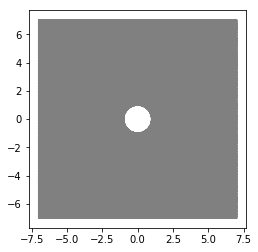

In [2]:
T = 1.0 # final time

# Create mesh and define function space
lx = ly = 7.0
R = 1.0

# Define 2D geometry
rectangle = Rectangle(Point(-lx,-ly), Point(lx, ly))
well = Circle(Point(0, 0), R)
dom = rectangle - well

# Generate and plot mesh
mesh = generate_mesh(dom, 150)
_ = plot(mesh, "2D mesh")

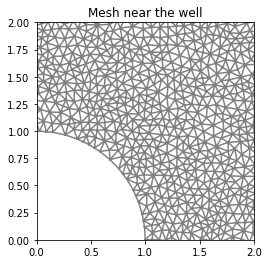

In [3]:
#plt.figure(figsize = [7,7])
plt.xlim([0,2])
plt.ylim([0,2])
plt.title('Mesh near the well')
plot(mesh, "2D mesh")
plt.savefig('Mesh_well.eps', format='eps', dpi=1000)

### Time step

In [4]:
hmin = mesh.hmin()
print('hmin: ', hmin)
hmax = mesh.hmax()
print('hmax: ', hmax)

CFL_bound = hmin**2
print('CFL bound: ', CFL_bound)

hmin:  0.05976529255655976
hmax:  0.11879159659726846
CFL bound:  0.0035718901943711774


In [5]:
dt = 0.0005
num_steps = np.floor(T/dt)
print('Num_steps: ', num_steps)

Num_steps:  2000.0


### Boundary conditions

In [6]:
V = FunctionSpace(mesh, 'P', 1)

# Define boundaries
wallsy    = 'near(x[1], -5.0) || near(x[1], 5.0)'
wallsx    = 'near(x[0], -5.0) || near(x[0], 5.0)'
cylinder = 'on_boundary && x[0]<2.0 && x[0]>-2.0 && x[1]>-2.0 && x[1]<2.0'


# Define boundary conditions
bcu_wallsy = DirichletBC(V, Constant(0.), wallsy)
bcu_wallsx = DirichletBC(V, Constant(0.), wallsx)

bcu_cylinder = DirichletBC(V, Constant(1.), cylinder)
bcu = [bcu_wallsx, bcu_wallsy, bcu_cylinder]

### Define the problem

In [7]:
vel = Expression(('5. + x[0]/2/DOLFIN_PI/(pow(x[0],2) + pow(x[1],2))',
                  '0. + x[1]/2/DOLFIN_PI/(pow(x[0],2) + pow(x[1],2))'  ), domain=mesh, degree=2)
sigma = 1

dx = Measure('dx', domain = mesh)

u = TrialFunction(V)
v = TestFunction(V)

# Define initial value
u_0 = Expression('0', domain=mesh, degree=2)
u_n = interpolate(u_0, V)

a = u * v * dx
L =  u_n * v * dx + dt * dot(vel, grad(u_n)) * v * dx - dt/2 * sigma ** 2 * dot(grad(u_n),grad(v)) * dx



### Solve the problem

In [8]:
# Time-stepping
u = Function(V)

t = 0
for n in range(int(num_steps)):

    # Update current time
    t += dt

    # Compute and update the solution
    solve(a == L, u, bcu)
    u_n.assign(u)

### Take the final step, visualize the result and compute some probabilities

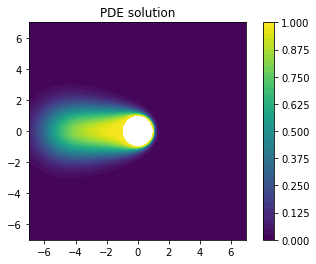

In [9]:
# Show the solution at the time of interest
p=plot(u)
plt.colorbar(p)
plt.title('PDE solution')
plt.savefig('PDE_sol.eps', format='eps', dpi=1000)
plt.show()

In [10]:
X = []
X.append([-1.5, 1])
X.append([-1.5, 2.])
X.append([-1.5, 3])
X.append([-3, 3])
X.append([-2, 0])
X.append([-3, 0])
X.append([-4, 0])
X.append([-5, 0])
X.append([0, 2.5])
X.append([1, 2])
X.append([0, 3])
X.append([-2, -5])
X.append([0, 4])
X.append([-1,5])
X.append([2, 2])
X.append([2,3])
X.append([-1,6])
X.append([-4, 4])
X.append([3, 3])
X.append([3.5, 3.5])
X.append([4, 4])
X.append([4.5,4.5])
X.append([5, 5])

for X0 in X:
    print(f'X0 = [{X0[0]}, {X0[1]}]')
    print(f'PDEProb = {u(X0)}')
    print('\n')

X0 = [-1.5, 1]
PDEProb = 0.7173050315908374


X0 = [-1.5, 2.0]
PDEProb = 0.10081408181152719


X0 = [-1.5, 3]
PDEProb = 0.003090773943173127


X0 = [-3, 3]
PDEProb = 0.015134991497104936


X0 = [-2, 0]
PDEProb = 0.9711230876720198


X0 = [-3, 0]
PDEProb = 0.9154860060658957


X0 = [-4, 0]
PDEProb = 0.8321005235054283


X0 = [-5, 0]
PDEProb = 0.6495989023233321


X0 = [0, 2.5]
PDEProb = 0.000851609120970076


X0 = [1, 2]
PDEProb = 0.00010054016952707408


X0 = [0, 3]
PDEProb = 6.293701166092087e-05


X0 = [-2, -5]
PDEProb = 1.1317604694267712e-06


X0 = [0, 4]
PDEProb = 3.303181697284141e-07


X0 = [-1, 5]
PDEProb = 7.148583080224669e-08


X0 = [2, 2]
PDEProb = 5.0556442459984824e-08


X0 = [2, 3]
PDEProb = 4.905568431669228e-10


X0 = [-1, 6]
PDEProb = 2.4928159570739955e-10


X0 = [-4, 4]
PDEProb = 0.0010498895742592233


X0 = [3, 3]
PDEProb = 1.1993935091850245e-13


X0 = [3.5, 3.5]
PDEProb = 1.6047626538217863e-16


X0 = [4, 4]
PDEProb = 1.7923821791644587e-19


X0 = [4.5, 4.5]
PDEP